# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# 2. Load Data

In [3]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
X = boston.data
y = boston.target

# 3. Train test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
X_train.shape

(404, 13)

In [7]:
X_test.shape

(102, 13)

# 4. Simple Linear Model

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [9]:
model.fit(X_train,y_train)
model.score(X_train,y_train)


0.7157028167828181

In [10]:
model.score(X_test,y_test)

0.7919938114361117

# 5. Ridge Regularization for Linear Model

In [11]:
from sklearn.linear_model import Ridge,Lasso
modelr=Ridge(alpha=1)
modelr.fit(X_train,y_train)
modelr.score(X_train,y_train)

0.7132577093113286

In [12]:
modelr.score(X_test,y_test)

0.7878831851310949

# 6. Lasso Regularization for Linear Model

In [13]:
modell=Lasso(alpha=1)
modell.fit(X_train,y_train)
modell.score(X_train,y_train)

0.6530419611241446

In [14]:
modell.score(X_test,y_test)

0.7060465009128778

# 7. Polynomial Regression of degree 2

In [15]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
x_train_poly=pf.fit_transform(X_train)
x_test_poly=pf.fit_transform(X_test)

In [16]:
modelp=LinearRegression()

In [17]:
modelp.fit(x_train_poly,y_train)
modelp.score(x_train_poly,y_train)

0.9251863664259596

In [18]:
modelp.score(x_test_poly,y_test)

0.8985765923967048

# 8. Ridge Regularization for Polynomial model

In [19]:
from sklearn.linear_model import Ridge,Lasso
modelr=Ridge(alpha=1)
modelr.fit(x_train_poly,y_train)
modelr.score(x_train_poly,y_train)

0.9188701321365949

In [20]:
modelr.score(x_test_poly,y_test)

0.904292456910307

# 9. Lasso Regularization for Polynomial model

In [21]:
modell=Lasso(alpha=1)
modell.fit(x_train_poly,y_train)
modell.score(x_train_poly,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.476e+03, tolerance: 3.065e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.8618873043630138

In [22]:
modell.score(x_test_poly,y_test)

0.9133547781953235

# 10. Select K Best

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
kbest=SelectKBest(score_func=f_regression,k=11)

In [24]:
x_selected=kbest.fit_transform(X,y)
x_selected.shape

(506, 11)

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x_selected,y, test_size=0.2)

In [26]:
lm = LinearRegression()
lm

LinearRegression()

In [27]:
lm.fit(xtrain,ytrain)
lm.score(xtrain,ytrain)


0.698619376857759

In [28]:
lm.score(xtest,ytest)

0.7310904475486626

##Manual feature selection

In [29]:
df=pd.DataFrame(data=X,columns=boston.feature_names)
df['Y']=y
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT     Y  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [30]:
corr=df.corr()

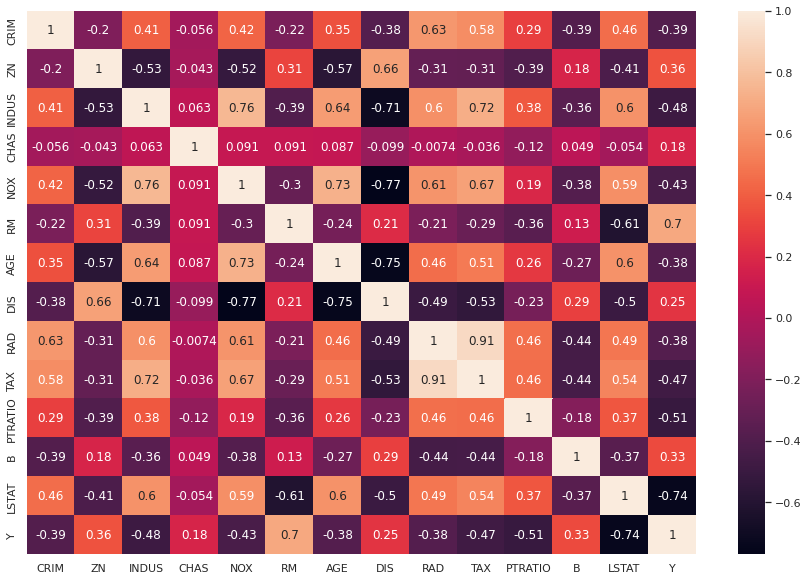

In [31]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr,annot=True)
plt.show()

In [32]:
columns=['RM','LSTAT','PTRATIO','INDUS','NOX','CRIM']

In [33]:
sdf=df[columns]
sdf.head()

RM  LSTAT  PTRATIO  INDUS    NOX     CRIM
0  6.575   4.98     15.3   2.31  0.538  0.00632
1  6.421   9.14     17.8   7.07  0.469  0.02731
2  7.185   4.03     17.8   7.07  0.469  0.02729
3  6.998   2.94     18.7   2.18  0.458  0.03237
4  7.147   5.33     18.7   2.18  0.458  0.06905

In [34]:
xs=df[['RM','LSTAT','PTRATIO','INDUS','NOX','CRIM']]

In [35]:
xtra, xtes, ytra, ytes = train_test_split(xs,y, test_size=0.2)

In [36]:
lmodel = LinearRegression()
lmodel

LinearRegression()

In [37]:
lmodel.fit(xtra,ytra)
lmodel.score(xtra,ytra)

0.7108791266360821

In [38]:
lmodel.score(xtes,ytes)

0.5760178393338589

# 11. Conclusion

The ridge and lasso regurization are used in order to prevent overfitting and underfitting.
From the above analysis, we can clearly say that regularization improves the accuracy as compared to simple linear models 

For the K best selection, first we have used manual feature selection where we have to select the features manually by checking the correlation of the features. As it is not affecting in accuracy of the model, so there won't be any problem even if we dont use. In Boston data also feature selection is not required as it does not improves the model accuracy.